# Análisis de reactivos desde la teoría Clásica de los test

https://cran.r-project.org/web/views/Psychometrics.html

http://www.personality-project.org/r/book/

In [1]:
library(psych, ggplot2)

In [2]:
entropy_y= function(y_values){
    frecs=prop.table(table(y_values*1))
    p_val=frecs["1"]
    q_val=frecs["0"]
    return (-(q_val*log2(q_val))-(p_val*log2(p_val)))}

entropy_xy=function(true_condition,reactivo){
    props_react=prop.table(table(reactivo))
    return (props_react["0"]*entropy_y(true_condition[reactivo==0])+props_react["1"]*entropy_y(true_condition[reactivo==1]))}
    
info_gain=function(true_condition,reactivo){entropy_y(true_condition)-entropy_xy(true_condition,reactivo)}

clasif_scores = function(true_condition,predicted){
    #Take vectors of ceros and ones for calculate informedness (Youden's J statistic) for 2 class classificator
    ferqtabl=table(true_condition,predicted)
    ferqtabl
    total=sum(ferqtabl)
    predict_pos=sum(ferqtabl[,2])#;predict_pos
    predict_neg=sum(ferqtabl[,1])#;predict_neg
    condit_pos=sum(ferqtabl[2,])#;condit_pos
    condit_neg=sum(ferqtabl[1,])#;condit_neg
    true_pos=ferqtabl[2,2]#;true_pos
    false_pos=ferqtabl[1,2]#;false_pos
    true_neg=ferqtabl[1,1]#;true_neg
    false_neg=ferqtabl[2,1]#;false_neg
    sensitivity=true_pos/condit_pos#recall
    specificity=true_neg/condit_neg
    precision=true_pos/predict_pos
    f1_score=2*((precision*sensitivity)/(precision+sensitivity))
    youden=sensitivity+specificity-1
    accuracy=(true_pos+true_neg)/total
    ### Aditional Measures
    react_gain=info_gain(true_condition,predicted)
    fisher=fisher.test(table(true_condition,predicted))$p.value
    chisq=chisq.test(table(true_condition,predicted))$p.value
    return (c("Fisher"=fisher,"Youden"=youden,"InfoGain"=react_gain,"F1"=f1_score,"Accuracy"=accuracy,"Chi Square"=chisq))
}

In [3]:
DATA=read.csv("res_pilot.csv")
TEST=DATA[c(4:15,17:27,30:80,82:97)]
DATA_Quest=read.csv("EstrCuest.csv")[3:7]

In [4]:
#Asignar clase pagador True a categoría A y false a las otras categorías
calif_deuda=NULL
for (calif in DATA$utm_medium){
    calif_deuda=c(calif_deuda,unlist(strsplit(as.character(calif), "_"))[1])
}
pagador=NULL
for (calif in calif_deuda){
    pagador=c(pagador,(calif=="A1"|calif=="A2"))
}
prop.table(table(pagador))

pagador
    FALSE      TRUE 
0.4901961 0.5098039 

In [6]:
# Estadísticos de los reactivos.
dat_explor=alpha(TEST)

Warning message in alpha(TEST):
“Item = A.veces.es.mejor.evitar.entrometerse.en.los.asuntos.de.los.vecinos. had no variance and was deleted”Warning message in alpha(TEST):
“Item = Ayudar.a.otros.me.hace.sentir.bien. had no variance and was deleted”Warning message in alpha(TEST):
“Item = Ayudo.en.las.labores.de.mi.casa. had no variance and was deleted”Warning message in alpha(TEST):
“Item = Debo.ser.agradecido.con.lo.poco.que.tengo. had no variance and was deleted”Warning message in alpha(TEST):
“Item = Le.digo.a.mi.familia.que.deben.ser.personas.trabajadoras. had no variance and was deleted”Warning message in alpha(TEST):
“Item = Me.gusta.decir.la.verdad. had no variance and was deleted”Warning message in alpha(TEST):
“Item = Me.siento.bien.cuando.actúo.de.manera.responsable. had no variance and was deleted”Warning message in alpha(TEST):
“Item = Mi.familia.me.dice.que.debo.ser.una.persona.colaboradora. had no variance and was deleted”Warning message in alpha(TEST):
“Item = Mis.amigos.

Some items ( Algunas.veces.es.bueno.evitar.responsabilidades. Algunas.veces.un.vecino.hace.cosas.malas. Algunos.amigos.pueden.esperar.más.tiempo.para.que.yo.les.pueda.pagar. Algunos.de.mis.amigos.son.irresponsables. En.ciertas.ocasiones.mis.vecinos.son.egoístas. En.ocasiones.las.cosas.salen.diferente.de.la.manera.en.la.que.las.planeamos. Es.mejor.evitar.que.los.hijos.sean.arriesgados. Es.mejor.hacer.las.cosas.uno.mismo.si.quiere.que.salgan.bien. Es.preferible.que.los.hijos.aprendan.a.hacer.las.cosas.solos. Está.bien.darse.por.vencido.en.algunas.ocasiones. Hay.personas.que.quieren.ser.tan.responsables.como.yo.lo.soy. He.organizado.reuniones.familiares.que.han.sido.malas.experiencias. He.visto.cómo.mis.padres.se.han.atrasado.en.sus.pagos.por.comprar.alimentos. He.visto.que.algunos.de.mis.amigos.dicen.mentiras. He.visto.que.en.mi.familia.han.tenido.problemas.difíciles.de.superar. He.visto.que.mi.pareja.hace.las.cosas.bien.con.poca.organización. La.gente.dice.que.trabajo.demasiado. Las.per

Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”In smc, the correlation matrix was not invertible, smc's returned as 1s
Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”In smc, the correlation matrix was not invertible, smc's returned as 1s
Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”Warning message in cor.smooth(R):
“Matrix was not positive defin

In [9]:
# Filtrar por índice de dificultad los extremos se descartan
limit=0.0001# se deja un límite pequeño para analizar la mayoría de los reactivos

filt_dif=dat_explor$item.stats[,"mean"]>=limit & dat_explor$item.stats[,"mean"]<=1-limit
TEST_2=TEST[,colnames(TEST)%in%rownames(dat_explor$item.stats)[filt_dif]]

table(colnames(TEST)%in%colnames(TEST_2))


FALSE  TRUE 
   15    75 

In [26]:
test_values=NULL
for (i in 1:ncol(TEST_2)){
    test_values=rbind(test_values,clasif_scores(as.numeric(pagador),TEST_2[,i]))
}
row.names(test_values)=colnames(TEST_2)

Warning message in chisq.test(table(true_condition, predicted)):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(table(true_condition, predicted)):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(table(true_condition, predicted)):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(table(true_condition, predicted)):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(table(true_condition, predicted)):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(table(true_condition, predicted)):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(table(true_condition, predicted)):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(table(true_condition, predicted)):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(table(true_condition, predicted)):
“Chi-squared approximation may be incorrect”Warning message in 

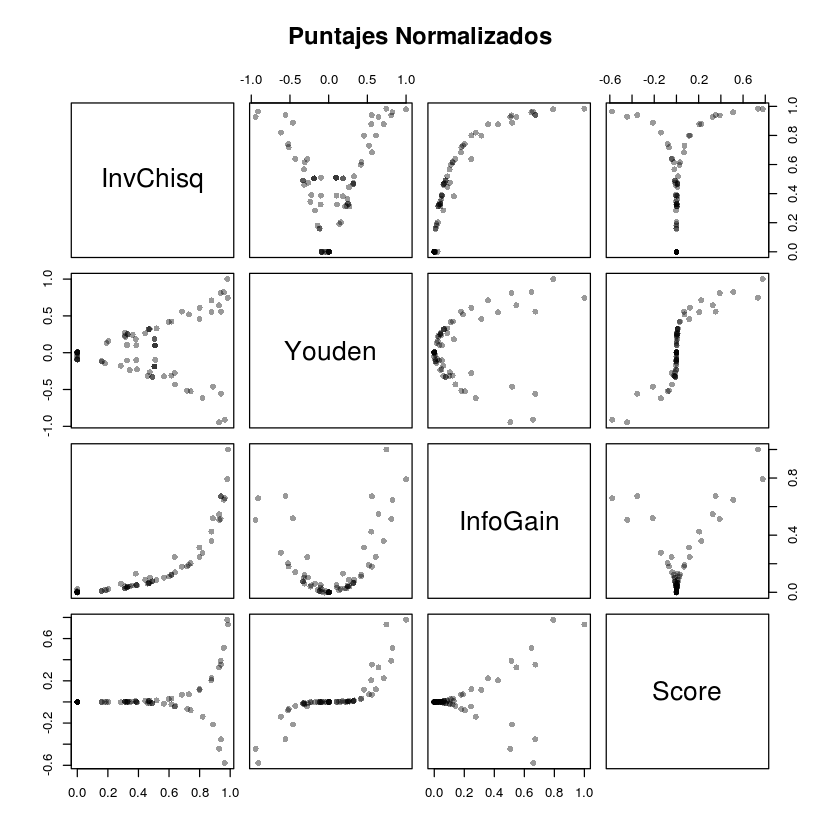

In [81]:
normlzd_data=data.frame(
    "InvChisq"=(1-test_values[,1]),
    "Youden"=(test_values[,2]*(1/max(test_values[,2]))),
    "InfoGain"=(test_values[,3]*(1/max(test_values[,3],na.rm=T))),
    "Score"=(
        (1-test_values[,1])*
        (test_values[,2]*(1/max(test_values[,2])))*
        (test_values[,3]*(1/max(test_values[,3],na.rm=T)))
    )
,row.names=colnames(TEST_2))
pairs(normlzd_data,pch=16, col=rgb(0,0,0,alpha=0.4), main= "Puntajes Normalizados")

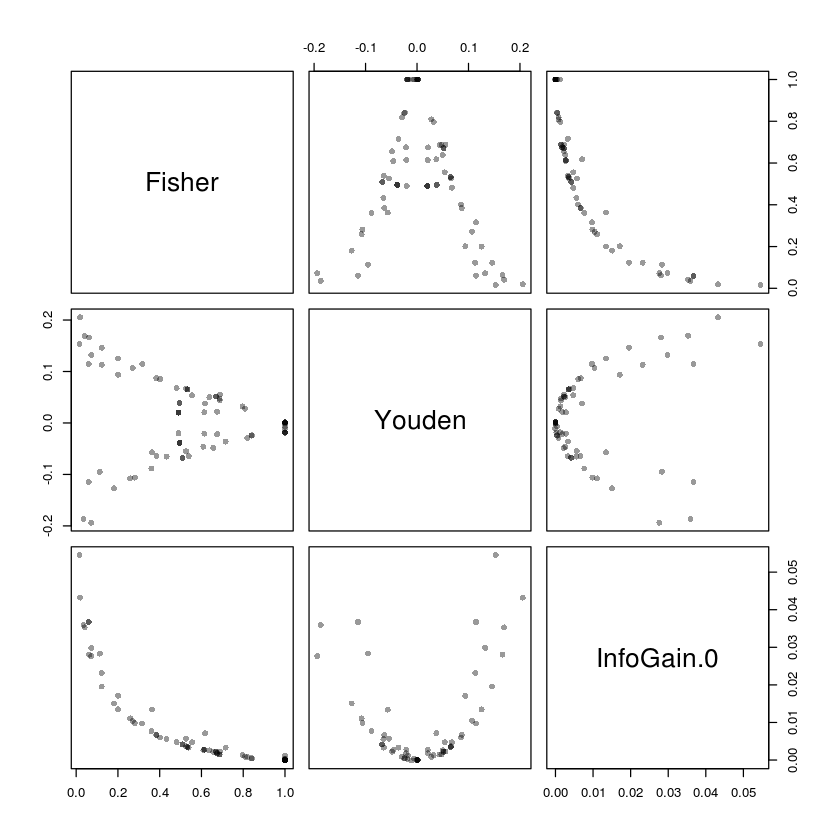

In [27]:
pairs(test_values[,1:3], pch=16, col=rgb(0,0,0,alpha=0.4))

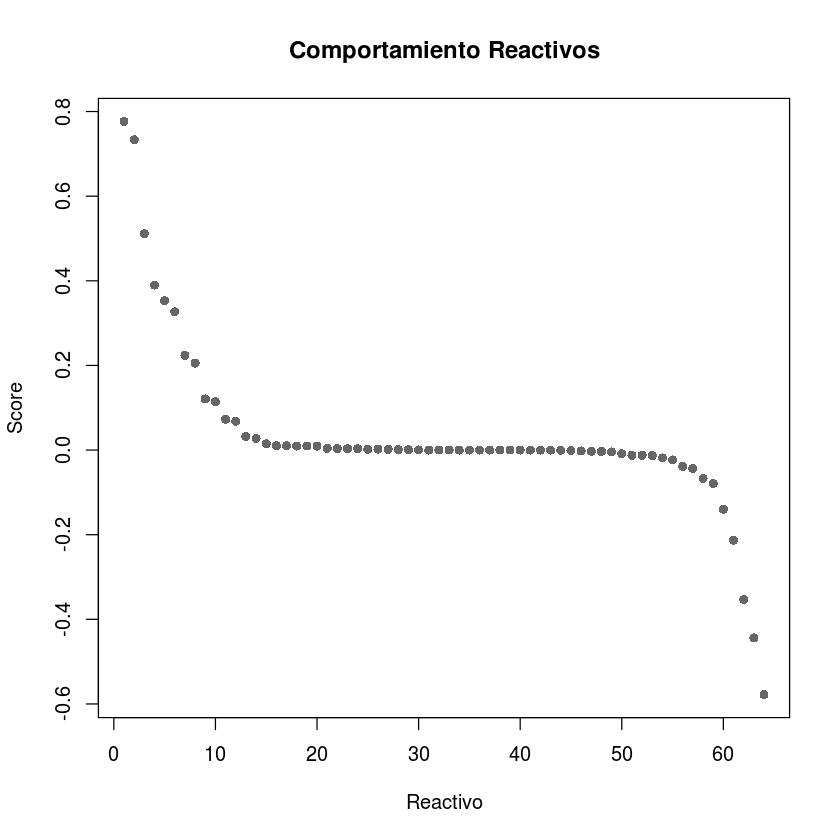

In [76]:
RANKING=data.frame("score"=sort(((1-test_values[,1])*
                                 (test_values[,2]*(1/max(test_values[,2])))*
                                 (test_values[,3]*(1/max(test_values[,3],na.rm=T)))
                                ),decreasing =T))
plot(RANKING$score, pch=16, col=rgb(0,0,0,alpha=0.6),ylab="Score",xlab="Reactivo", main="Comportamiento Reactivos")